In [122]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 4, 2
sns.set()

In [123]:
Years = range(1880, 2011)

pieces = []
columns =['Name', 'Sex', 'Births']

for year in Years:

    path = r'C:\projects\Python\data\babynames/yob%d.txt' % year
    df = pd.read_csv(path, names=columns)
    df['Year'] = year
    pieces.append(df)


#Собрать все данные в один объект DataFrame

Data = pd.concat(pieces, ignore_index=True)

TypeError: isinstance() arg 2 must be a type or tuple of types

In [124]:
globals()['list']

KeyError: 'list'

In [3]:
Data.head()

,Name,Sex,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### Делаю Маленький фрейм для тестирования визуализации

In [4]:
data_min = Data[Data['Year'] == 2000]

In [5]:
data_min.head()


,Name,Sex,Births,Year
1332172,Emily,F,25949,2000
1332173,Hannah,F,23066,2000
1332174,Madison,F,19965,2000
1332175,Ashley,F,17991,2000
1332176,Sarah,F,17677,2000


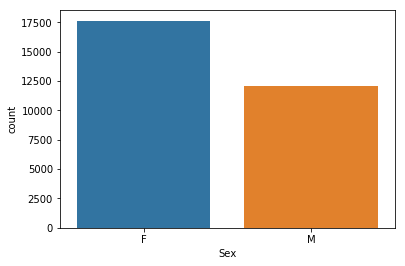

In [8]:
sns.countplot(data_min['Sex']);

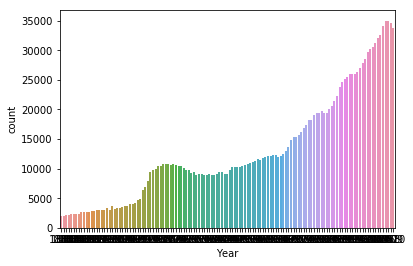

In [11]:
sns.countplot(Data['Year']);

In [60]:
Data['Year_category'] = Data['Year'].apply(lambda x: 0 if x < 1924 else 2 if x > 1968 else 1)

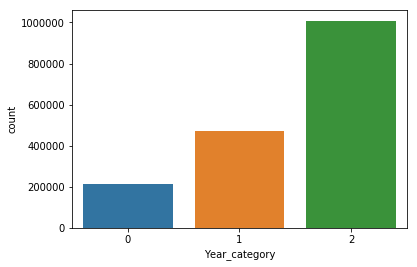

In [61]:
sns.countplot(Data['Year_category']);

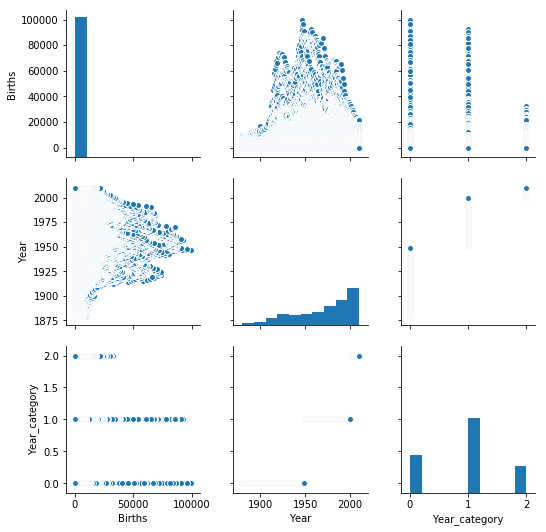

In [18]:
sns.pairplot(Data);

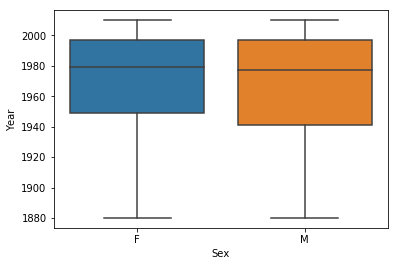

In [19]:
sns.boxplot(x='Sex', y='Year', data=Data);

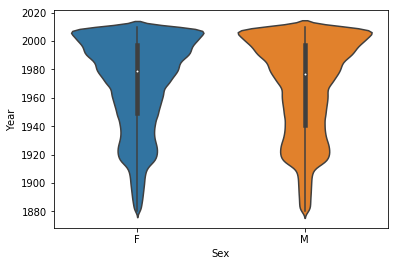

In [20]:
sns.violinplot(x='Sex', y='Year', data=Data);

In [ ]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();



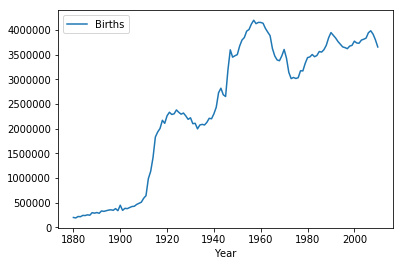

In [45]:

Data[['Births']+['Year']].groupby('Year').sum().plot();

In [62]:
df = Data.drop('Name',axis = 1)
df = pd.get_dummies(df)

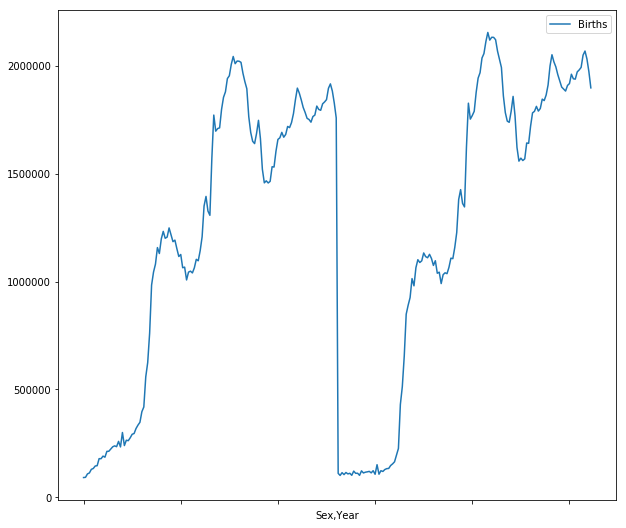

In [85]:
Data_Sex_Year_group = Data.groupby(['Sex','Year'])['Births'].sum()
Data.groupby(['Sex','Year'])['Births'].sum().plot(subplots=True, figsize=(10, 10), rot=0, sharey=True, legend=True);

### Задача стоит разобратся в Сиборне! Хочу вывести 2 лини динамики рождаемости по годам для мальчиков и девочек

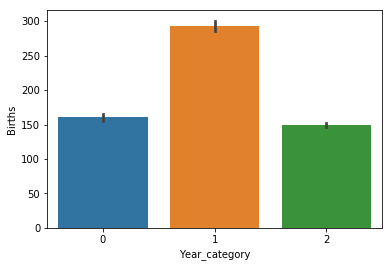

In [77]:
sns.barplot(x = 'Year_category', y ='Births', data = Data);

In [93]:
df = Data.drop('Name',axis = 1).drop('Year_category', axis = 1)

In [94]:
df = pd.get_dummies(df).plot(figsize=(5, 5), rot=0, sharey=True, legend=True,label = 'Male');

In [174]:
Male = Data[Data['Sex'] =='M'].groupby('Year')['Births'].sum()

In [170]:
Female = Data[Data['Sex'] =='F'].groupby('Year')['Births'].sum()

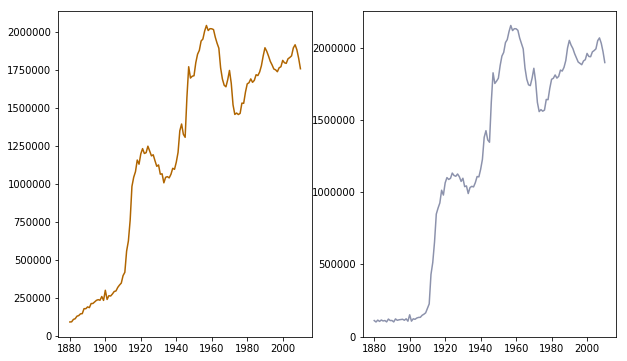

In [196]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))
ax[0].plot(Female, color ='#b06500');
ax[1].plot(Male, color = '#8c92ac');

In [224]:
Fe_Ma = pd.DataFrame(Female)

In [225]:
Fe_Ma = Fe_Ma.rename(columns={'Births': 'Девочки'})

In [226]:
Fe_Ma['Мальчики'] = Male

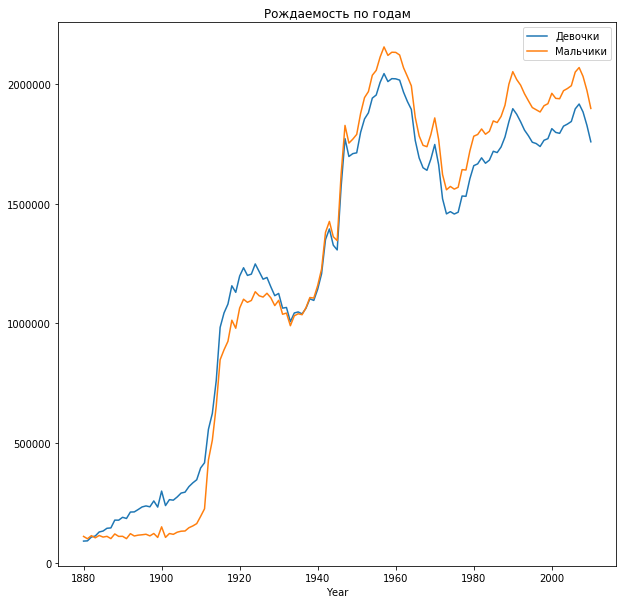

In [231]:
Fe_Ma.plot(figsize=(10, 10), rot=0, sharey=True, legend=True,title='Рождаемость по годам');

## 2.Вопрос:
●	Найдите самые популярные имена за всю историю

In [244]:
Data.tail()

,Name,Sex,Births,Year,Year_category
1690779,Zymaire,M,5,2010,2
1690780,Zyonne,M,5,2010,2
1690781,Zyquarius,M,5,2010,2
1690782,Zyran,M,5,2010,2
1690783,Zzyzx,M,5,2010,2


In [5]:
Data_Name = Data.groupby('Name')['Births'].sum()

In [243]:
Data_Name.sort_values(ascending=False);

## 3.Вопрос:
●	Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [210]:
Data['Decade'] = 10 * ((Data['Year'] + 12) // 10)

In [229]:
Data.drop('Decade',inplace = True, axis = 1)

In [221]:
Data['Year_12'] = pd.cut(Data['Year'], 13)

In [99]:
z = np.linspace(1880,2010,10,round)

In [4]:
# Создаю новый признак по которому можно будет отгрупировать данные
Data['Year_10'] = Data['Year'].apply(lambda x: 0 if x <= 1893 else
                                               1 if x <= 1906 else
                                               2 if x <= 1919 else
                                               3 if x <= 1932 else
                                               4 if x <= 1945 else
                                               5 if x <= 1958 else
                                               6 if x <= 1971 else
                                               7 if x <= 1984 else
                                               8 if x <= 1997 else
                                               9 )
    
    

In [5]:
List_M = []
for year_10 in range(0,10):
    List_M.append(Data[(Data['Sex'] == 'M') &(Data['Year_10'] == year_10)].groupby('Name')['Births'].sum().argmax())

In [6]:
List_F = []
for year_10 in range(0,10):
    List_F.append(Data[(Data['Sex'] == 'F') &(Data['Year_10'] == year_10)].groupby('Name')['Births'].sum().argmax())

In [11]:
List_M, List_F

(['John',
  'John',
  'John',
  'Robert',
  'James',
  'James',
  'Michael',
  'Michael',
  'Michael',
  'Jacob'],
 ['Mary',
  'Mary',
  'Mary',
  'Mary',
  'Mary',
  'Linda',
  'Lisa',
  'Jennifer',
  'Jessica',
  'Emily'])

In [205]:
# Так как нам здесь не интересно имена по периодам то удаляем дубликаты
Set_M = set(List_M)
Set_F = set(List_F)
Set_All_Name = set()
Set_All_Name = Set_All_Name.union(Set_M,Set_F)
Set_All_Name

{'Emily',
 'Jacob',
 'James',
 'Jennifer',
 'Jessica',
 'John',
 'Linda',
 'Lisa',
 'Mary',
 'Michael',
 'Robert'}

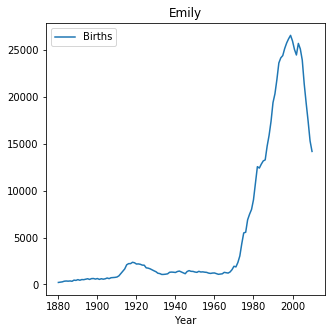

In [30]:
Data[Data['Name'] == 'Emily'].groupby('Year')['Births'].sum(). \
plot(figsize=(5, 5), rot=0, sharey=True, legend=True,title='Emily');

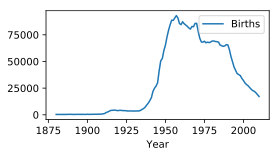

In [81]:
Data[Data['Name'] == 'Michael'].groupby('Year').sum().plot();

Lisa
Mary
Jennifer
Jessica
Michael
John
Linda
Jacob
Robert
James
Emily


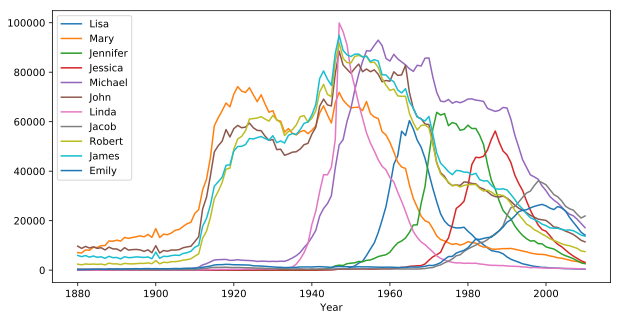

In [207]:
for name in Set_All_Name:
    print(name)
    Data[Data['Name'] == name].groupby('Year')['Births'].sum().plot(figsize = (10,5))
    plt.legend(Set_All_Name)

In [118]:
Data_Name_POP = pd.DataFrame(index = [x for x in range(1880,2011)])
for name in Set_All_Name:
    Data_Name_POP[name] = Data[Data['Name'] == name].groupby('Year')['Births'].sum()


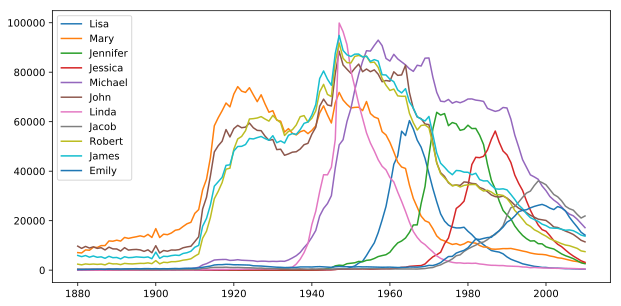

In [126]:
Data_Name_POP.plot(figsize = (10,5));

## Вопрос 4:
●	Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

In [ ]:
group = group.sort_index(by='prop', ascending=False)
   ....:     return group.prop.cumsum().searchsorted(q)+1

In [120]:
df = Data[Data['Year'] == 2000]

TypeError: isinstance() arg 2 must be a type or tuple of types

In [131]:
z = np.array()

TypeError: 'list' object is not callable

In [77]:
df.drop('Prop',inplace=True,axis=1)

In [79]:
df['Births'].sum()

3775662

In [118]:
# Создаю новый признак процентное отношение к общему числу родившихся
df['Prop'] = (df['Births'] / df['Births'].sum()) *100

TypeError: isinstance() arg 2 must be a type or tuple of types

In [86]:
df =df.sort_values(by='Prop',ascending=False)

In [88]:
df.head()

,Name,Sex,Births,Year,Prop
1349821,Jacob,M,34454,2000,0.912529
1349822,Michael,M,32016,2000,0.847957
1349823,Matthew,M,28563,2000,0.756503
1349824,Joshua,M,27522,2000,0.728932
1332172,Emily,F,25949,2000,0.687270


In [117]:
# Новый признак сумма пропорций
df['Sum_prop'] = df['Prop'].cumsum()

TypeError: 'list' object is not callable

In [125]:
np.array

[1, 2, 3, 4]

In [126]:
z

[1, 2, 3, 4]

In [129]:
isinstance(df, __builtins__.list)

False

In [130]:
df

TypeError: isinstance() arg 2 must be a type or tuple of types

TypeError: isinstance() arg 2 must be a type or tuple of types

In [93]:
df['Sum_prop'].searchsorted(50)

array([210], dtype=int64)

In [100]:
df[:]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [127]:
df['Sum_prop'].searchsorted(50)

TypeError: isinstance() arg 2 must be a type or tuple of types

In [46]:
df['Prop_cumsum'].searchsorted(0.5)

array([52], dtype=int64)

In [20]:
prop_cusum = df.sort_index(by='Prop',ascending=False)['Prop'].cumsum()

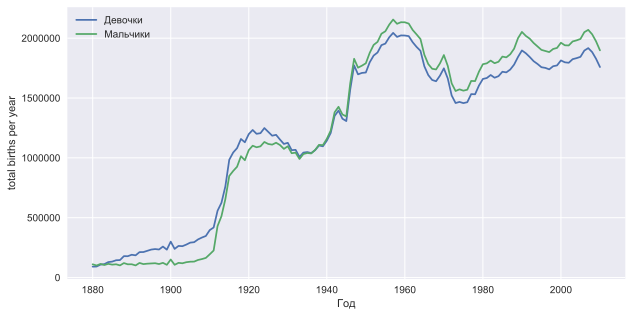

In [213]:
Data.pivot_table('Births', index='Year', columns='Sex', aggfunc='sum').plot(figsize = (10,5))
plt.ylabel('total births per year');
plt.xlabel('Год');
plt.legend(['Девочки','Мальчики']);